In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from def_functions import *

In [2]:
train_values= pd.read_csv('data/train_values0422.csv')
test_values= pd.read_csv('data/test_values0422.csv')
train_word= pd.read_csv('data/train_word_0422.csv')
test_word= pd.read_csv('data/test_word_0422.csv')
print ("Data is loaded!")

Data is loaded!


In [3]:
missing_data=missing_values_table(train_values)
missing_data.head()

,Missing Values,percent of Total Values


In [4]:
missing_data=missing_values_table(test_values)
missing_data.head()

,Missing Values,percent of Total Values
实际税率(%),7,0.013462
抵押面积(公顷),1,0.001923
土地面积,1,0.001923
评估金额(万元),1,0.001923
抵押金额(万元),1,0.001923


In [5]:
test_values['实际税率(%)']=test_values['实际税率(%)'].fillna(test_values['实际税率(%)'].mean())
test_values=test_values.fillna(0)
test_values.isnull().sum().max()

0

In [6]:
missing_data=missing_values_table(train_word)
missing_data.head(20)

,Missing Values,percent of Total Values
付息方式_到期一次还本付息,2317,0.772333
债券品种_中央企业债,2317,0.772333
债券品种_企业债券,2317,0.772333
债券品种_公司、企业债,2317,0.772333
债券品种_地方企业债,2317,0.772333
债券品种_沪企债,2317,0.772333
债券品种_深企债,2317,0.772333
债券品种_银行间企债,2317,0.772333
付息方式_按年付息,2317,0.772333
付息方式_附息式固定利率,2317,0.772333


In [7]:
train_word=train_word.fillna(0)
test_word=test_word.fillna(0)
train_word.isnull().sum().max()

0

In [8]:
train_values.shape,train_word.shape

((2916, 50), (3000, 124))

In [9]:
test_values.shape,test_word.shape

((520, 49), (552, 124))

In [10]:
train=pd.merge(train_values,train_word,on='企业编号',how='inner')

In [11]:
test=pd.merge(test_values,test_word,on='企业编号',how='inner')

In [12]:
train.head()

,企业编号,营业总收入(元),存货周转天数(天),总资产周转率(次),应收账款周转天数(天),流动比率,速动比率,资产负债率(%),基本每股收益(元),扣非每股收益(元),...,土地用途_科教用地,土地用途_空闲地,土地用途_管道运输用地,土地用途_经济适用住房用地,土地用途_街巷用地,土地用途_设施农用地,土地用途_采矿用地,土地用途_铁路用地,土地用途_风景名胜设施用地,土地用途_高档住宅用地
0,1001,9.160835,50207.6489,0.16,-0.983074,7.206956,1.356152,0.407891,12.0170,12.0170,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1002,5.950903,58.5600,2.03,0.600578,6.570000,1.613759,6.271521,5.4100,5.1200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,6.771706,494.2700,4.38,0.927193,11.040000,-0.032697,4.168928,0.9009,0.9009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1004,5.033701,62.5900,1.36,0.152138,4.040000,-0.632775,2.230774,3.9600,3.9600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005,6.184149,977.2600,1.07,-0.029311,7.960000,0.641031,1.426780,0.6490,0.6490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
test.head()

,企业编号,营业总收入(元),存货周转天数(天),总资产周转率(次),应收账款周转天数(天),流动比率,速动比率,资产负债率(%),基本每股收益(元),扣非每股收益(元),...,土地用途_科教用地,土地用途_空闲地,土地用途_管道运输用地,土地用途_经济适用住房用地,土地用途_街巷用地,土地用途_设施农用地,土地用途_采矿用地,土地用途_铁路用地,土地用途_风景名胜设施用地,土地用途_高档住宅用地
0,4001,137.5900,7679.28,1.95,-0.019027,16.87,-0.239087,5.555230,2.2644,2.2641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4002,54.3200,902.13,2.33,-0.816679,19.97,-1.609176,6.324575,1.2674,1.2674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4003,222.5500,821.63,10.77,1.966261,79.42,0.131951,18.369966,3.5768,3.5766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4004,34.6800,15.22,0.92,0.013127,5.18,0.410022,1.950492,0.7429,0.7429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4005,23.8095,5552.28,0.64,-0.866701,11.32,0.268972,9.955448,-2.1900,-2.1900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print ("Train: ",train.shape[0],"company, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"company, and ",test.shape[1],"features")

Train:  2916 company, and  173 features
Test:  520 company, and  172 features


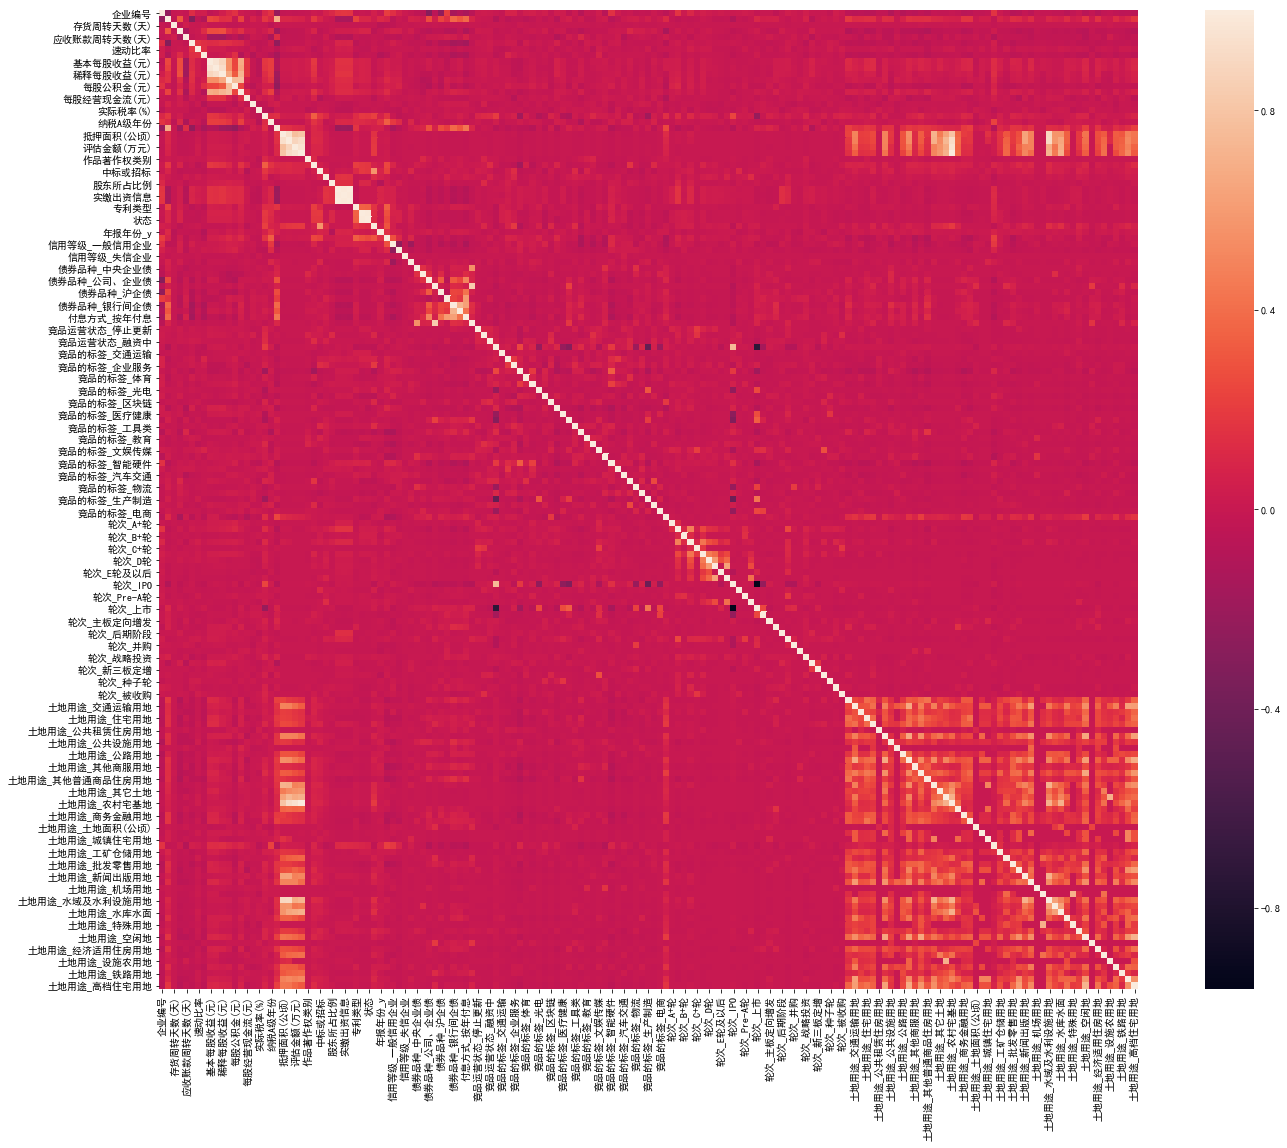

In [15]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, square=True);

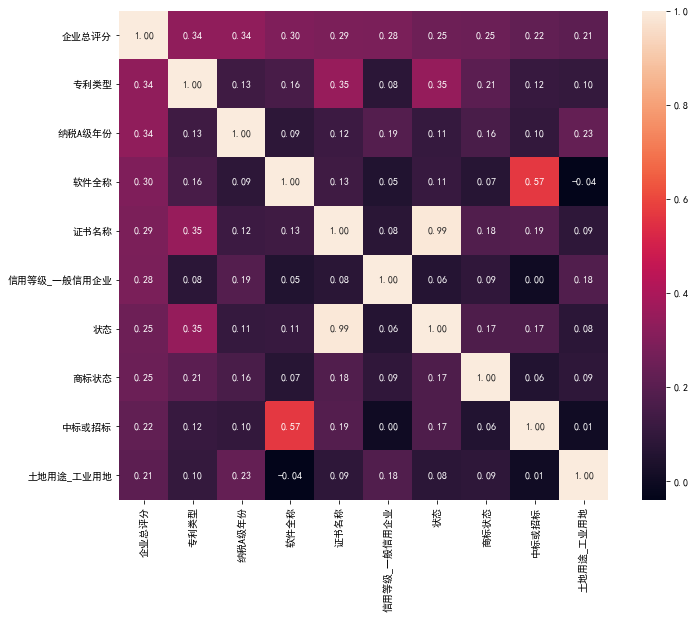

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, '企业总评分')['企业总评分'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [17]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('企业总评分')
quantitative.remove('企业编号')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [18]:
qualitative

['行业大类（代码）',
 '类型',
 '经营状态',
 '是否购地',
 '是否有作品',
 '是否有债券',
 '是否有商标',
 '是否有招投标',
 '是否认缴',
 '是否有专利',
 '是否有资质',
 '是否有版权']

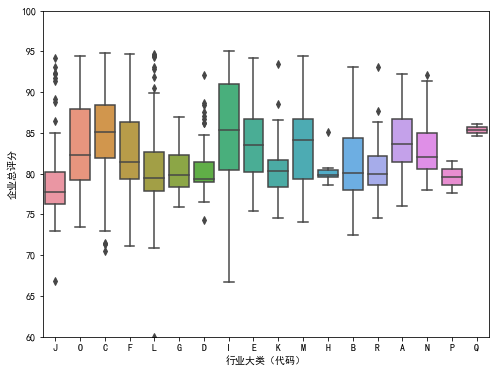

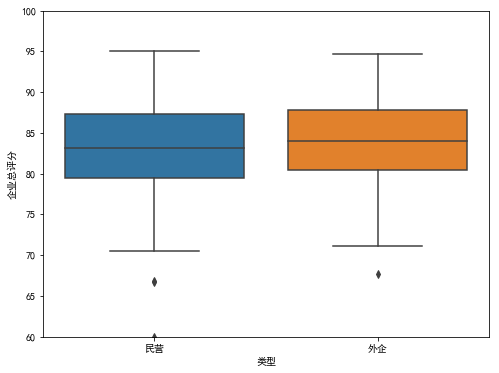

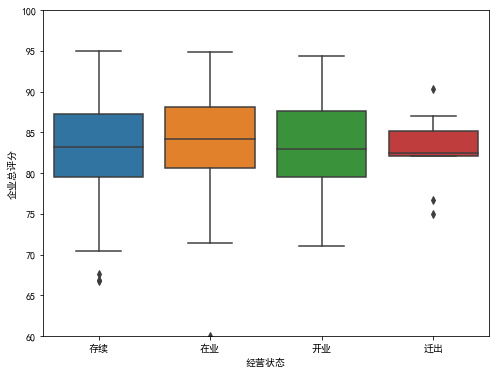

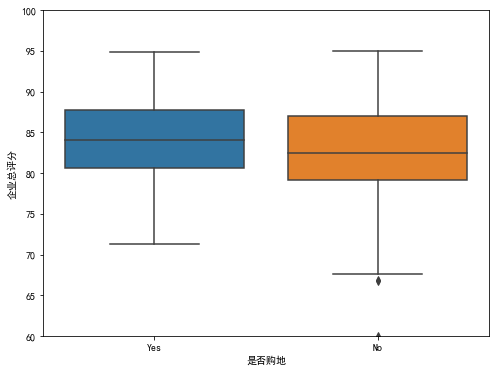

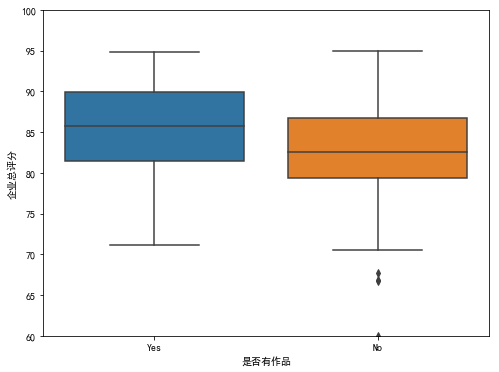

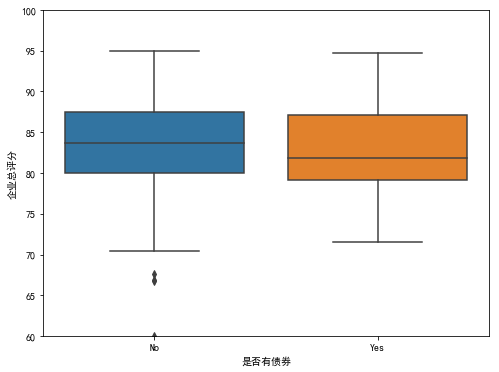

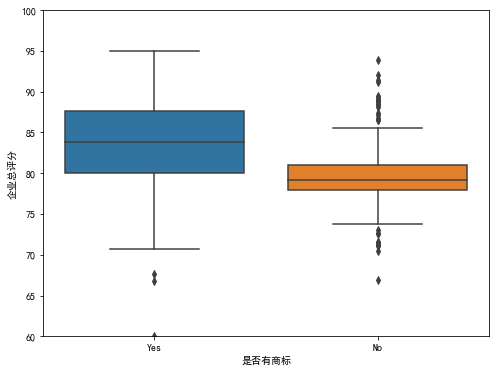

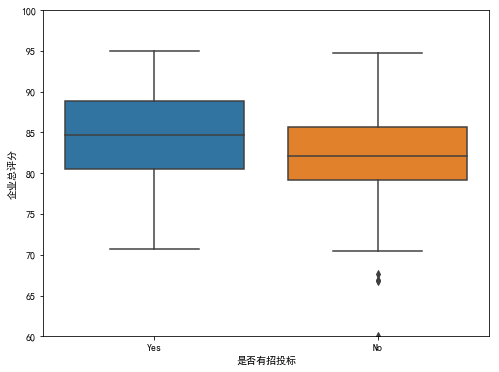

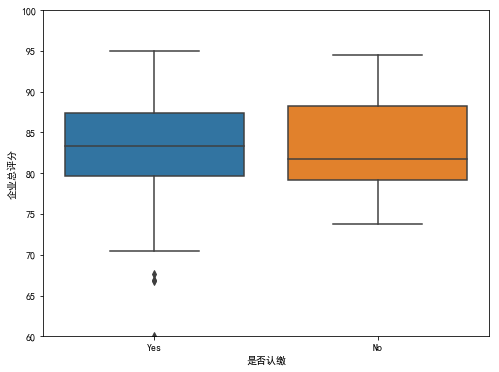

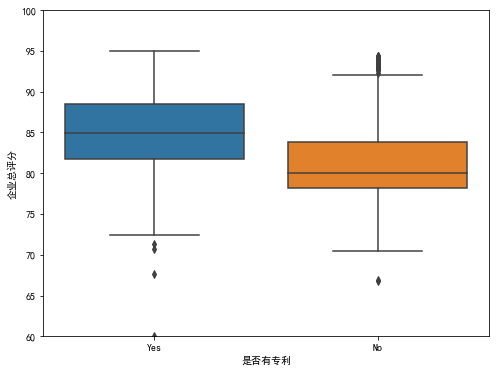

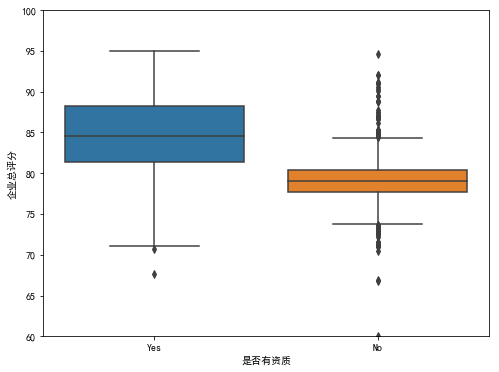

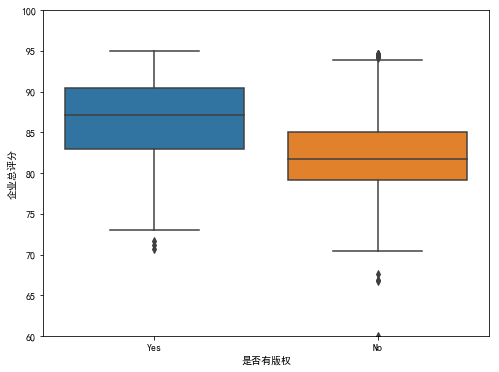

In [19]:
for var in qualitative:
    data = pd.concat([train['企业总评分'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="企业总评分", data=data)
    fig.axis(ymin=60, ymax=100);

In [20]:
train.drop(['企业编号'], axis=1, inplace=True)
test.drop(['企业编号'], axis=1, inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
y = train['企业总评分'].reset_index(drop=True)

In [21]:
train_features = train.drop(['企业总评分'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [22]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(3436, 204)

In [23]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((2916, 204), (2916,), (520, 204))

In [24]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [25]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [26]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)       

In [27]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=31,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=6,
                                       feature_fraction=0.8,
                                       feature_fraction_seed=7,
                                       verbose=-1, 
                                       )

In [28]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                     max_depth=5, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [29]:
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm),
                                meta_regressor=lightgbm,
                                use_features_in_secondary=True)

In [30]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

xgboost: 3.0227 (0.2219)
 2019-04-22 14:28:49.513079


In [400]:
score = np.sqrt(-cross_val_score(stack_gen, np.array(X), np.array(y), scoring="neg_mean_squared_error", cv=kfolds))
print("stack_gen: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

stack_gen: 3.0963 (0.2178)
 2019-04-22 12:26:04.342085


In [159]:
score = cv_rmse(ridge)
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 3.6745 (0.2062)
 2019-04-21 12:11:27.283121


In [75]:
score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

elastic net: 4.4622 (1.3994)
 2019-04-19 13:29:16.981423


In [257]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

SVR: 3.6099 (0.1345)
 2019-04-21 20:46:00.535659


In [396]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

gbr: 3.1200 (0.2182)
 2019-04-22 11:40:38.681881


In [370]:
score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

lightgbm: 3.0897 (0.2022)
 2019-04-22 09:43:55.055047


In [378]:
y_pred1=xgb_model_full_data.predict(X)
y_pred2=lgb_model_full_data.predict(X)

In [379]:
print(rmsle(y, y_pred1))

1.9866033544343138


In [380]:
print(rmsle(y, y_pred2))

0.4409855277133932


In [297]:
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=31,
                                       learning_rate=0.01, 
                                       n_estimators=1000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=6,
                                       feature_fraction=0.8,
                                       feature_fraction_seed=7,
                                       verbose=-1, 
                                       )
params_test1={
    'max_depth': range(3,6,9),
    'num_leaves':range(30,35,40)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch1.fit(X, y)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    8.8s finished


({'mean_fit_time': array([2.93694649]),
  'std_fit_time': array([0.61973484]),
  'mean_score_time': array([0.1867939]),
  'std_score_time': array([0.05207048]),
  'param_max_depth': masked_array(data=[3],
               mask=[False],
         fill_value='?',
              dtype=object),
  'param_num_leaves': masked_array(data=[30],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 3, 'num_leaves': 30}],
  'split0_test_score': array([-9.55756456]),
  'split1_test_score': array([-10.88940518]),
  'split2_test_score': array([-7.7850418]),
  'split3_test_score': array([-7.67687947]),
  'split4_test_score': array([-11.64481193]),
  'mean_test_score': array([-9.51063753]),
  'std_test_score': array([1.59959053]),
  'rank_test_score': array([1]),
  'split0_train_score': array([-6.30383543]),
  'split1_train_score': array([-6.17731676]),
  'split2_train_score': array([-6.70886633]),
  'split3_train_score': array([-6.71850954]),
  'spl

In [298]:
params_test2={
    'max_depth': [3,4,5],
    'num_leaves':[10,20,30]
}
gsearch2 = GridSearchCV(estimator=model_lgb, param_grid=params_test2, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch2.fit(X, y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  1.1min finished


({'mean_fit_time': array([3.07926159, 3.41524572, 3.57955728, 5.25167308, 5.27744589,
         4.94193625, 5.29199057, 6.87217112, 6.03157105]),
  'std_fit_time': array([0.17388623, 0.14428342, 0.19206185, 0.206821  , 0.18646222,
         0.24938437, 0.08958525, 0.20504717, 0.78301355]),
  'mean_score_time': array([0.22022538, 0.17285781, 0.22006993, 0.21991124, 0.24665608,
         0.24167023, 0.2094347 , 0.27865272, 0.23226666]),
  'std_score_time': array([0.03892587, 0.0318386 , 0.05710808, 0.08229598, 0.05672252,
         0.05373638, 0.06061547, 0.05581066, 0.07476484]),
  'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_num_leaves': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
               mask=[False, False, False, False, False, False, False, False,
                     False],
      

In [300]:
params_test3={
    'min_child_samples': [18, 19, 20, 21, 22],
    'min_child_weight':[0.001, 0.002]
}
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=20,
                                       learning_rate=0.01, 
                                       n_estimators=1000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=5,
                                       feature_fraction=0.8,
                                       feature_fraction_seed=7,
                                       verbose=-1, 
                                       )
gsearch3 = GridSearchCV(estimator=model_lgb, param_grid=params_test3, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch3.fit(X, y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.4min finished


({'mean_fit_time': array([6.32699428, 6.29671712, 5.73798327, 5.84880075, 5.70782952,
         6.06048942, 5.69097276, 5.8422286 , 5.32882876, 4.89588494]),
  'std_fit_time': array([0.13265926, 0.07410638, 0.43328873, 0.22320009, 0.23202031,
         0.28900754, 0.20200305, 0.18938948, 0.11212122, 0.67995214]),
  'mean_score_time': array([0.27852702, 0.24339924, 0.22836514, 0.26505527, 0.22019534,
         0.20027499, 0.23277926, 0.2045743 , 0.20167465, 0.17203875]),
  'std_score_time': array([0.06066739, 0.05241605, 0.03035906, 0.06725842, 0.02239367,
         0.03007075, 0.05242602, 0.02896542, 0.03716209, 0.05332851]),
  'param_min_child_samples': masked_array(data=[18, 18, 19, 19, 20, 20, 21, 21, 22, 22],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[0.001, 0.002, 0.001, 0.002, 0.001, 0.002, 0.001, 0.002,
           

In [302]:
params_test4={
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=20,
                                       learning_rate=0.01, 
                                       n_estimators=1000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=5,
                                       feature_fraction=0.8,
                                       feature_fraction_seed=7,
                                       min_child_samples=19,
                                       min_child_weight=0.001,
                                       verbose=-1, 
                                       )
gsearch4 = GridSearchCV(estimator=model_lgb, param_grid=params_test4, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch4.fit(X, y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  3.1min finished


({'mean_fit_time': array([4.12335911, 4.93145771, 5.0708056 , 5.40916224, 6.34855947,
         4.23561373, 5.06952238, 5.33831553, 5.58752904, 6.03520741,
         4.10675101, 4.60711603, 5.16364546, 5.65426888, 6.08754086,
         4.17346706, 4.69048233, 5.28125877, 5.76512871, 6.28324394,
         4.14918704, 4.65744371, 5.22396255, 5.8776021 , 6.00830626]),
  'std_fit_time': array([0.19252751, 0.29862983, 0.06773922, 0.24198572, 0.26309726,
         0.21116534, 0.21562866, 0.49625334, 0.13058335, 0.07606162,
         0.09234763, 0.06948264, 0.08462704, 0.10310629, 0.08121121,
         0.06808197, 0.10231489, 0.15581866, 0.1488157 , 0.13608368,
         0.10105414, 0.13290932, 0.07157342, 0.22815927, 0.49150937]),
  'mean_score_time': array([0.29913445, 0.20964742, 0.25227156, 0.1783062 , 0.30021548,
         0.23634901, 0.23222756, 0.18421526, 0.19238334, 0.18446674,
         0.20904584, 0.18596592, 0.19514503, 0.17794695, 0.18341827,
         0.18615246, 0.18904414, 0.18131351, 0.

In [33]:
params_test6={
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=20,
                                       learning_rate=0.01, 
                                       n_estimators=1000,
                                       max_bin=200, 
                                       bagging_fraction=0.8,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=5,
                                       feature_fraction=0.6,
                                       feature_fraction_seed=7,
                                       min_child_samples=19,
                                       min_child_weight=0.001,
                                       verbose=-1, 
                                       )
gsearch6 = GridSearchCV(estimator=model_lgb, param_grid=params_test6, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch6.fit(X, y)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 245 out of 245 | elapsed:  6.0min finished


({'mean_fit_time': array([5.628053  , 5.46415396, 6.13464952, 4.96900187, 4.93647709,
         4.90358348, 4.76333141, 4.72423143, 4.86099429, 4.77896008,
         5.1381906 , 4.84196377, 4.64518433, 4.63103833, 4.60705581,
         4.63705626, 4.61647148, 4.60739255, 4.65079217, 4.72641644,
         4.712713  , 4.75378656, 4.67388763, 4.78904352, 4.64588385,
         4.62377057, 4.63967624, 4.61958079, 4.6372838 , 4.64349589,
         4.64022636, 4.75343018, 4.71322384, 4.629459  , 4.60627031,
         4.6945477 , 4.6371181 , 4.6346365 , 4.62071729, 4.65654168,
         4.65794206, 4.76500902, 4.67725773, 4.64757872, 4.65007257,
         4.6275423 , 4.78732004, 4.70802188, 4.47571106]),
  'std_fit_time': array([0.1113558 , 0.16324254, 0.62131607, 0.80448149, 0.11421501,
         0.13065651, 0.13418043, 0.0734317 , 0.12347129, 0.08734458,
         0.33017929, 0.41944844, 0.07389401, 0.09143806, 0.10415271,
         0.08457363, 0.08373954, 0.08514168, 0.09540025, 0.11625996,
         0.

In [305]:
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([4.97596812, 4.56519141, 4.6299655 , 4.72964907, 5.43317046,
         4.98735261, 4.9069509 , 4.95638523, 5.23807311, 5.42600513,
         5.09586973, 5.1090209 , 5.07387486, 5.09463382, 4.92699361,
         4.87130556, 4.83654909, 5.12759809, 4.85708809, 4.87348876,
         5.09928212, 5.22957554, 5.44758   , 5.47263279, 4.98646793,
         5.18768034, 5.08697381, 5.07819328, 4.73698864, 5.39143648,
         5.35630507, 4.88529487, 5.33161945, 5.01836019, 4.91344862,
         5.19264803, 5.33601446, 4.66230583, 4.617031  , 4.5413662 ,
         4.81081457, 5.40598211, 5.21312242, 5.25594907, 5.13760023,
         4.8067359 , 4.63621383, 4.590065  , 4.51367254]),
  'std_fit_time': array([0.2578803 , 0.11026726, 0.11237604, 0.07414189, 0.27021681,
         0.10661426, 0.11396824, 0.16849571, 0.0999547 , 0.17277503,
         0.16568717, 0.20657061, 0.04743203, 0.23840107, 0.13267028,
         0.17266269, 0.13875544, 0.2614112 , 0.11746111, 0.23838751,
         0.

In [308]:
params_test7={
    'learning_rate': [0.001, 0.005, 0.01, 0.03, 0.08,0.1, 0.3, 0.5],
}
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=20, 
                                       n_estimators=1000,
                                       max_bin=200, 
                                       bagging_fraction=0.8,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=5,
                                       feature_fraction=0.6,
                                       feature_fraction_seed=7,
                                       min_child_samples=19,
                                       min_child_weight=0.001,
                                       reg_alpha=0.5,
                                       reg_lambda=0.08,
                                       verbose=-1, 
                                       )
gsearch7 = GridSearchCV(estimator=model_lgb, param_grid=params_test7, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch7.fit(X, y)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  1.3min finished


({'mean_fit_time': array([5.94360957, 5.47433562, 5.35310512, 4.77999725, 5.66613784,
         6.7588419 , 5.10665741, 3.29836974]),
  'std_fit_time': array([0.17093302, 0.07057071, 0.31242476, 0.39792461, 0.54760554,
         0.51215276, 0.42439934, 0.09671855]),
  'mean_score_time': array([0.24677029, 0.26287665, 0.24231625, 0.27035418, 0.39675727,
         0.49249759, 0.28082891, 0.15130754]),
  'std_score_time': array([0.03982124, 0.02400728, 0.0378969 , 0.04603239, 0.08152246,
         0.14099868, 0.0708526 , 0.03478971]),
  'param_learning_rate': masked_array(data=[0.001, 0.005, 0.01, 0.03, 0.08, 0.1, 0.3, 0.5],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.001},
   {'learning_rate': 0.005},
   {'learning_rate': 0.01},
   {'learning_rate': 0.03},
   {'learning_rate': 0.08},
   {'learning_rate': 0.1},
   {'learning_rate': 0.3},
   {'learning_rate': 0.5}],
  'split

In [310]:
params_test8={
    'n_estimators': [1000, 2000, 3000, 4000, 5000],
}
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=20, 
                                       learning_rate=0.005,
                                       max_bin=200, 
                                       bagging_fraction=0.8,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=5,
                                       feature_fraction=0.6,
                                       feature_fraction_seed=7,
                                       min_child_samples=19,
                                       min_child_weight=0.001,
                                       reg_alpha=0.5,
                                       reg_lambda=0.08,
                                       verbose=-1, 
                                       )
gsearch8 = GridSearchCV(estimator=model_lgb, param_grid=params_test8, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch8.fit(X, y)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  2.0min finished


({'mean_fit_time': array([ 5.73045092,  9.61928167, 13.88925571, 18.86039767, 22.06988721]),
  'std_fit_time': array([0.20106802, 0.20133565, 0.29219299, 0.40950993, 2.12310149]),
  'mean_score_time': array([0.30081697, 0.5308754 , 0.78771591, 1.10951843, 1.22081485]),
  'std_score_time': array([0.06232203, 0.0726125 , 0.04764992, 0.0574432 , 0.31518659]),
  'param_n_estimators': masked_array(data=[1000, 2000, 3000, 4000, 5000],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 1000},
   {'n_estimators': 2000},
   {'n_estimators': 3000},
   {'n_estimators': 4000},
   {'n_estimators': 5000}],
  'split0_test_score': array([-9.52296314, -9.5706656 , -9.67731483, -9.74202285, -9.84619727]),
  'split1_test_score': array([-10.54751427, -11.01333455, -11.26090938, -11.43696118,
         -11.58944046]),
  'split2_test_score': array([-7.68612298, -7.74591786, -7.84054556, -7.9253013 , -8.020745  ]),
  'sp

In [35]:
model_lgb =LGBMRegressor(objective='regression', 
                                       num_leaves=20, 
                                       n_estimators=1000,
                                       learning_rate=0.005,
                                       max_bin=200, 
                                       bagging_fraction=0.8,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       max_depth=5,
                                       feature_fraction=0.6,
                                       feature_fraction_seed=7,
                                       min_child_samples=19,
                                       min_child_weight=0.001,
                                       reg_alpha=0.5,
                                       reg_lambda=0.08,
                                       verbose=-1, 
                                       )

In [363]:
score = cv_rmse(model_lgb)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

lightgbm: 2.9940 (0.2159)
 2019-04-22 09:36:56.846365


In [381]:
print('lightgbm')
lgb_model_full_data = model_lgb.fit(X, y)

lightgbm


In [382]:
y_lightgbm=lgb_model_full_data.predict(X)

In [383]:
print(rmsle(y, y_lightgbm))

2.4253672415585097


In [384]:
params_test1={
    'n_estimators': [500, 1000,1500,2000, 2500],
}
model_xgboost = XGBRegressor(learning_rate=0.01,
                                     max_depth=5, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
gsearch1 = GridSearchCV(estimator=model_xgboost, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch1.fit(X, y)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  6.7min finished


({'mean_fit_time': array([17.92060499, 38.45710115, 58.13859282, 78.77021866, 91.58375282]),
  'std_fit_time': array([ 0.08343132,  0.38075818,  0.4536984 ,  0.48847265, 14.19122076]),
  'mean_score_time': array([0.03256631, 0.04771805, 0.04266963, 0.05785985, 0.08598127]),
  'std_score_time': array([0.01592389, 0.01281061, 0.00586242, 0.00801462, 0.02320836]),
  'param_n_estimators': masked_array(data=[500, 1000, 1500, 2000, 2500],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 500},
   {'n_estimators': 1000},
   {'n_estimators': 1500},
   {'n_estimators': 2000},
   {'n_estimators': 2500}],
  'split0_test_score': array([-10.01664864,  -9.79510047,  -9.83252112,  -9.91978883,
          -9.99562965]),
  'split1_test_score': array([-13.66954755, -13.05656422, -13.43958337, -13.77977492,
         -13.94814824]),
  'split2_test_score': array([-7.94484075, -8.13899831, -8.23611646, -8.29746364, -8.

In [386]:
params_test2={
    'max_depth': [3, 4,5, 7, 9], 
    'min_child_weight': [1, 3, 4, 5, 6],
}
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
gsearch2 = GridSearchCV(estimator=model_xgboost, param_grid=params_test2, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch2.fit(X, y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed: 22.5min finished


({'mean_fit_time': array([23.27940211, 23.41858573, 23.16544952, 35.87004895, 22.9552084 ,
         31.83191013, 31.62745991, 31.91632943, 31.44096189, 32.60634089,
         42.79567251, 38.93409314, 35.52608118, 35.3941175 , 36.42361245,
         54.58114123, 52.04291587, 53.23923054, 52.75665903, 48.64634323,
         69.29420176, 70.19289212, 68.21865931, 65.1886682 , 53.97240653]),
  'std_fit_time': array([ 0.24393868,  0.12105342,  0.08985114,  6.37321802,  0.65578335,
          0.97190271,  0.35938564,  0.6115379 ,  0.71528231,  0.66550215,
          0.95171362,  1.3423264 ,  0.1928401 ,  0.39939488,  0.4259401 ,
          2.58900649,  1.07854918,  1.13572933,  0.5945989 ,  2.13839523,
          1.23865478,  7.06928384,  2.62453387,  0.57972302, 14.54435761]),
  'mean_score_time': array([0.04495845, 0.04470801, 0.0420258 , 0.02737813, 0.03889093,
         0.039289  , 0.05272293, 0.05211329, 0.0336493 , 0.04099665,
         0.04483581, 0.04505196, 0.03322444, 0.03924465, 0.0394610

In [388]:
params_test3={
'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                         max_depth=4,min_child_weight=6,
                                     subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
gsearch3 = GridSearchCV(estimator=model_xgboost, param_grid=params_test3, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch3.fit(X, y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  3.9min finished


({'mean_fit_time': array([30.24954929, 30.72377858, 31.66464887, 30.71083794, 29.62952619,
         26.04334064]),
  'std_fit_time': array([2.44158513, 0.51403299, 0.37114794, 1.0250594 , 0.59456346,
         3.38247279]),
  'mean_score_time': array([0.04248667, 0.03187275, 0.03918777, 0.03424339, 0.03113518,
         0.02690058]),
  'std_score_time': array([0.00680115, 0.00934498, 0.00778694, 0.00312105, 0.00168435,
         0.0062029 ]),
  'param_gamma': masked_array(data=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6}],
  'split0_test_score': array([-9.68872307, -9.66676396, -9.66725443, -9.6835566 , -9.67941361,
         -9.67612231]),
  'split1_test_score': array([-11.33297481, -11.33297481, -11.33297481, -11.33297481,
         -11.32319636, -11.38274271]),
  

In [390]:
params_test4={
'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                     max_depth=4,min_child_weight=6,
                                     gamma=0.5,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
gsearch4 = GridSearchCV(estimator=model_xgboost, param_grid=params_test4, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch4.fit(X, y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 11.1min finished


({'mean_fit_time': array([27.91506481, 27.13363333, 26.47814336, 25.04267349, 28.50241823,
         29.56547103, 31.29028864, 31.25198021, 34.41773133, 36.03666315,
         36.18692307, 34.856709  , 39.80844288, 40.91856475, 39.62755232,
         38.94600549]),
  'std_fit_time': array([0.51116529, 0.3164051 , 0.96305526, 0.47493764, 0.05148749,
         1.04246295, 0.27166996, 0.25958192, 0.76057275, 0.10503756,
         0.22275651, 0.91677635, 0.6014154 , 0.51281108, 0.74063863,
         0.49485196]),
  'mean_score_time': array([0.03083754, 0.04556384, 0.03518434, 0.03847713, 0.03568516,
         0.03479657, 0.04175773, 0.04073758, 0.04188809, 0.0411675 ,
         0.0408391 , 0.04311538, 0.04541559, 0.05093441, 0.04679689,
         0.03390093]),
  'std_score_time': array([0.00158922, 0.00941644, 0.01271233, 0.01160404, 0.00971746,
         0.00471746, 0.0162634 , 0.01535399, 0.00818711, 0.0070508 ,
         0.0065804 , 0.01500459, 0.01116841, 0.0089083 , 0.01629775,
         0.006090

In [395]:
params_test5={
'learning_rate': [0.001, 0.005, 0.01, 0.03, 0.08,0.1, 0.3, 0.5],
}
model_xgboost = XGBRegressor(n_estimators=1000,
                                     max_depth=4,min_child_weight=6,
                                     gamma=0.5,colsample_bytree=0.7,subsample=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
gsearch5 = GridSearchCV(estimator=model_xgboost, param_grid=params_test5, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch5.fit(X, y)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.8min finished


({'mean_fit_time': array([18.83543687, 27.77620234, 28.80284076, 29.96615791, 30.3772027 ,
         30.13149381, 30.11964593, 28.01479468]),
  'std_fit_time': array([0.7783087 , 0.43945765, 0.38593909, 0.11094339, 0.19415126,
         0.16856857, 0.16334856, 1.84918053]),
  'mean_score_time': array([0.029144  , 0.0378624 , 0.02664266, 0.02863846, 0.02821813,
         0.03080735, 0.03277392, 0.02825708]),
  'std_score_time': array([0.00319984, 0.0124348 , 0.0056887 , 0.00801428, 0.00309194,
         0.00109259, 0.00531934, 0.01373374]),
  'param_learning_rate': masked_array(data=[0.001, 0.005, 0.01, 0.03, 0.08, 0.1, 0.3, 0.5],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.001},
   {'learning_rate': 0.005},
   {'learning_rate': 0.01},
   {'learning_rate': 0.03},
   {'learning_rate': 0.08},
   {'learning_rate': 0.1},
   {'learning_rate': 0.3},
   {'learning_rate': 0.5}],


In [34]:
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                     max_depth=4,min_child_weight=6,subsample=0.7,
                                     gamma=0.5,colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [393]:
score = cv_rmse(model_xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

xgboost: 3.0164 (0.2116)
 2019-04-22 11:16:35.255448


In [36]:
stack_gen1 = StackingCVRegressor(regressors=(model_xgboost, model_lgb),
                                meta_regressor=model_lgb,
                                use_features_in_secondary=True)

In [37]:
score = np.sqrt(-cross_val_score(stack_gen1, np.array(X), np.array(y), scoring="neg_mean_squared_error", cv=kfolds))
print("stack_gen: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

stack_gen: 3.0006 (0.2130)
 2019-04-22 15:26:22.085038


In [38]:
print('START Fit')
print('StackingCVRegressor')
stack_gen_model = stack_gen1.fit(np.array(X), np.array(y))

print('xgboost')
model_xgb_full_data = model_xgboost.fit(X, y)

print('lightgbm')
model_lgb_full_data = model_lgb.fit(X, y)

START Fit
StackingCVRegressor
xgboost
lightgbm


In [40]:
y_pred1=stack_gen_model.predict(np.array(X))
y_pred2=model_xgb_full_data.predict(X)
y_pred3=model_lgb_full_data.predict(X)

In [42]:
print('RMSLE score on train data:')
print(rmsle(y,y_pred1))

RMSLE score on train data:
2.2030010918986807


In [43]:
print('RMSLE score on train data:')
print(rmsle(y,y_pred2))

RMSLE score on train data:
2.355810611286597


In [44]:
print('RMSLE score on train data:')
print(rmsle(y,y_pred2))

RMSLE score on train data:
2.355810611286597
